# Multidimensional scaling



Multidimensional scaling is a family of related algorithms which given pairwise dissimilarities of the input data aim to reconstruct a map to lower dimensional spaces in which distances between projections are preserved. In general, dissimilarity does not need to be measured by a $\textit{metric}$ and this will be the main difference between the two distinct variations of MDS popular in the literature: $\textit{metric MDS}$ and $\textit{non-metric (general) MDS}$. 


# Classical MDS algorithm

Consider you are given some input data $y_1,\dots,y_N$ which lies in some high dimensional space $R^D$. Suppose that you also have Eucledian distance matrix $D = (d_{ij})_{i,j=1,\dots,N}$. Classical MDS then aims to find lower dimensional set of projections $x_1,\dots,x_N$ which satisfy $||x_i-x_j|| = d_{ij}$. Such a projection does not have to be unique because for any solution $\widehat{X}=\widehat{x_1},\dots,\widehat{x_N}$ the translation of these projections $X^*=\widehat{X}+c$ also satisfies $||x_i^*-x_j^*|| = ||\widehat{x_i}+c-\widehat{x_j}-c||=d_{ij}$ for $c$ denoting a constant term of appropriate dimensionality. Any location $c$ can be used, but often assumption of centered configurations is made for simplicity,i.e.:
\begin{align}
\sum_{i=1}^N{x_{i,k}} = 0,\text{ for all } k,
\end{align}
and this assumption serves well if we are interested in dimensionality reduction/visualisation. That is, the classical MDS algorithm finds the centered configuration $x_1,\dots,x_N \in R^q$ for $q<<N$ so that their pairwise distances are the same as the corresponding distances $D$ in the original data space.  Often, we may find the $N\times N$ Gram matrix $G = XX^T$ instead of $X$. The Gram matrix is the inner product matrix since $X$ is assumed to be centered. We have 
\begin{align}
d_{ij}^2 = g_{ii} + g_{jj} - 2g_{ij} 
\end{align}
from $||x_i - x_j||^2 = x_i^{T}x_i+x_j^{T}x_j - 2x_i^Tx_j$. From the constraint that $x_1,\dots,x_N$ are centered it also follows that 
\begin{align}
\sum_{i=1}^N g_{ij} = \sum_{i=1}^N\sum_{k=1}^q x_{ik}x_{jk} = \sum_{i=1}^N x_{ik}\sum_{k=1}^q x_{jk}=0
\end{align}
for $j=1,\dots,N$. If we denote the trace of matrix $G$ with $trace(G)=\sum_{i=1}^N g_{ii}$ we can show that:
\begin{align}
\sum_{i=1}^N d_{ij}^2 = trace(G) + Ng_{jj}\\
\sum_{j=1}^N d_{ij}^2 = trace(G) + Ng_{ii}\\
\sum_{j=1}^N \sum_{i=1}^N d_{ij}^2 = 2NT
\end{align}
Given this expression, the unique solution for $g_{ij}$ is given by:
\begin{align}
g_{ij} = -1/2(d_{ij}^2 - d_{.j}^2 - d_{i.}^2 + d_{..}^2)
\end{align}
Equivalently in matrix form this means that the unique solution for $G$ is given by: $G = -1/2\text{trace}(G)D^{2}\text{trace}(G)$. 
From basic linear algebra, it then follows that a solution $\widehat{X}$ is then given by the eigen-decomposition of $G$. That is, for $G = V\Lambda V^T$:
\begin{align}
\widehat{X} = \Lambda ^{1/2}V^T
\end{align}

The space in which the projections $X$ lie is the eigenspace where the first coordinate contains the largest variation. If we are reducing the dimensionality of the data from $D$ to $q$, then the first $q$ rows of $X$ best preserve the distances $d_{ij}$ among all other linear dimension reduction of $Y$ to $r^q$. For classical MDS, we will compute the projection matrix in reduced $q$-dimensional space in a single iterations:
\begin{align}
X_{(q)} = \Lambda_q^{1/2} V^T_q
\end{align}
where $\Lambda_q$ is the first $q\times q$ sub matrix of $\Lambda$ and $V_q$ is collected through the first $q$ columns of $V$.  

$\textbf{Remarks}$
 - classical MDS learns projections $X_{(q)}$ in $R^q$ for any dimension $q = 1,\dots,D$.
 - the inferred configuration is centered
 - the coordinates are given by the principal order of largest-to-smallest variances
 - dimension reduction using classical MDS from $Y\in R^D$ to $X\in R^q$ is equivalent to dimensionality reduction of $Y$ to $X$ using principal component analysis (PCA)
 - when dissimilarity is measured with Euclidean distances, the solution is exact

$\textbf{Problems}$
- Run classical MDS and PCA algorithms to verify that they learn the same lower dimensional projections $X$.

# Implementation 

In [1]:
import numpy as np
 
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

# Metric and non-metric MDS

While classical MDS aimed to find projections $X$ such that $\widehat{d_{ij}} \approx d_{ij}=||x_i - x_j||^2$ in general we can also relax this assumption and consider MDS methods (distance scaling) where the dissimilarities between the projections $\widehat{d_{ij}} \approx f(d_{ij})$ for a monotone function $f$. 
For quantitative inputs $Y$ we will call the resulting procedure $\textit{metric MDS}$ and for qualitative inputs (categorical, ordinal, etc.) we will call it $\textit{non-metric MDS}$. Note that once we depart from classical MDS, projections cannot be found in a single interations through eigen decomposition and iterative optimization is required. 

$\textbf{Metric MDS}$:


Given a low dimension $q$ and a monotone function $f$, metric MDS seeks to find an optimal configuration $X\in R^q$ such that $f(d_{ij}) \approx \widehat{d_{ij}} = ||x_i - x_j||^2$ is as $\textit{close to an equality}$.
The function $f$ can be taken to be a parametric monotonic function, such as $f(d_{ij}) = \alpha + \beta d_{ij}$. The metric MDS then minimizes the squared loss (stress function):
\begin{align}
\mathcal{L(\widehat{d_{ij}})} = \left( \frac{\sum_{i<j} \left(\widehat{d_{ij}} - f(d_{ij}) \right)^2}{\sum d_{ij}^2} \right)^{\frac{1}{2}}
\end{align}
Metric MDS minimizes the stress function over all $\widehat{d_{ij}}$, $\alpha$ and $\beta$. The most common metric MDS algorithm which we can all the $\textit{usual}$ MDS assumes the special case $f(d_{ij}) = d_{ij}$. Note that the this MDS algorithm is not actually equivalent to the classical MDS algorithm since learning is still done with an iterative optimization procedure.



$\textbf{Non-metric MDS}$: 


In many applications of MDS, dissimilarities are known only by their rank order, and the spacing between successively ranked dissimilarities is of no interest, it is unavailable or even it is not feasible to compute for the given data time (consider ordinal data). 
Given a low dimension $q$, non-metric MDS seeks to find an optimal configuration $X\in R^q$ that gives $f(d_{ij}) \approx d_{ij} = ||x_i - x_j||^2$  as close as possible. Unlike metric MDS however, note that here $f$ is much more general and is only implicitly defined. 
 - in non-metric MDS $f(d_{ij}) = d_{ij}^*$ are called $\textit{disparities}$, which only preserve the order of $d_{ij}$, i.e. 
 \begin{align}
 d_{ij}<d_{kl} ~ \iff ~ f(d_{ij})\leq f(d_{kl})
               ~ \iff ~ d_{ij}^{*} \leq d_{kl}^{*}
 \end{align}
 One of the more popular variations of non-metric MDS is $\textbf{Kruskal’s non-metric MDS algorithm}$ which minimizes the following stress function:
 \begin{align}
\text{stress}(\widehat{d_{ij}},d^{*}_{ij}) = \left( \sum_{i<j} {\frac{\left(\widehat{d_{ij}} - d_{ij}^{*}\right)^2}{\sum \widehat{d_{ij}}^2}} \right)
 \end{align}
 The original dissimilarities are only used when checking that the ranking of all $d^{*}$ mirrors the required original ranking. In fact only the order $d_{ij} < d_{kl} < d_{mf}$ among the dissimilarities is needed.  


In [2]:
import pandas as pd
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold
from sklearn import datasets

# Load the iris data
iris = datasets.load_iris()
X = iris.data
target = iris.target
#names = iris.target_name

print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)

plt.scatter(X_mds[:,0],X_mds[:,1])
plt.axis('equal');
plt.show()


Computing MDS embedding
Done. Stress: 263.082695


<Figure size 640x480 with 1 Axes>

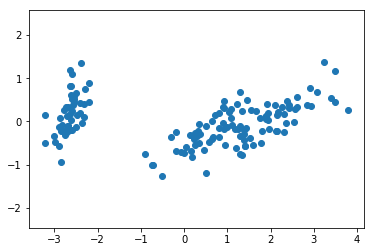

In [3]:
from scipy.spatial import distance_matrix
D = distance_matrix(X, X)
[X, evals] = cmdscale(D)
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

# Sammon mapping

Sammon mapping is a generalization of the usual metric MDS. In Sammon mapping we minize the Sammon’s stress:
\begin{align}
E = \text{Sammon's stress}(\widehat{d_{ij}}) = \frac{1}{\sum_{l<k}d_{lk}}{\sum_{i<j}\frac{(\widehat{d_{ij}} - d_{ij})^2}{d_{ij}}}
\end{align}

This weighting system normalizes the squared-errors in pairwise distances by using the distance in the original space. As a result, Sammon mapping preserves the small $d_{ij}$ , giving them a greater degree of importance in the fitting procedure than for larger values of $d_{ij}$. Optimal solution is found by numerical computation (initial
value by classical MDS). 
<br>
To obtain Sammon mapping learning algorithm, we just minimize the stress function with gradient descent (steepest descent) algorithm with respect to the projections $x$ and any other unknowns. Let us denote with $d_{ij}' = ||x_i - x_j||$. Then we can write bellow the partial derivative of the stress function as:
\begin{align}
\frac{\partial E}{\partial x_{ij}} = -\frac{2}{c}\sum_k \sum_{i \neq j} \left( \frac{d_{ik} - d_{ik}' }{d_{ik}d_{ik}'}\right)\left(x_{ij} - x_{kj}\right)
\end{align}
where $c = \sum_i \sum_{j>i} d_{ij}$ nad is measured in this way to avoid summing over distances of points twice. 
Finally, we also need the second derivative as well to obtain the iterative updates for the projections:
\begin{align}
\frac{\partial^2 E}{\partial^2 x_{ij}} = -\frac{2}{c}\sum_k \sum_{i \neq j} \frac{1}{d_{ik}d_{ik}'}\left[\left(d_{ik} - d_{ik}'\right) - \frac{\left(x_{ij} - x_{kj}\right)^2}{d_{ik}} \left( 1 + \frac{d_{ik} - d_{ik}'}{d_{ik}'}\right)\right].
\end{align}
Then the learning of the lower dimensional projections in Sammon mapping continues with iterative updates of the form:
\begin{align}
x_{ij}^{(m+1)} = x_{ij}^{(m)} - \alpha \frac{\frac{\partial E^{(m)}}{\partial x_{ij}^{(m)}}}{\left|\frac{\partial^2 E^{(m)}}{\partial^2 x_{ij}^{(m)}}\right|}
\end{align}
where $\alpha$ is sometimes called the "magic factor" and controls the learning rate of the map. It is usually find empirically (by trying different values) and some sources claim that values of $\alpha = 0.3$ and $\alpha = 0.4$ tend to be good starting point.


Code example of how Sammon mapping compares to classical MDS and hence PCA and maybe optimization MDS

In [4]:
def sammon(x, n = 2, display = 2, inputdist = 'raw', maxhalves = 20, maxiter = 500, tolfun = 1e-9):

    import numpy as np 
    from scipy.spatial.distance import cdist

    X = x

    # Create distance matrix unless given by parameters
    if inputdist == 'distance':
        xD = X
    else:
        xD = cdist(X, X)

    # Initialisation
    N = X.shape[0]
    scale = 0.5 / xD.sum()

    Y = np.random.normal(0.0,1.0,[N,n])
    one = np.ones([N,n])

    xD = xD + np.eye(N)        
    xDinv = 1 / xD # Returns inf where D = 0.
    xDinv[np.isinf(xDinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).    
    yD = cdist(Y, Y) + np.eye(N)
    yDinv = 1. / yD # Returns inf where d = 0. 
    
    np.fill_diagonal(xD, 1)    
    np.fill_diagonal(yD, 1)
    np.fill_diagonal(xDinv, 0)
    np.fill_diagonal(yDinv, 0)
    
    xDinv[np.isnan(xDinv)] = 0
    yDinv[np.isnan(xDinv)] = 0
    xDinv[np.isinf(xDinv)] = 0    
    yDinv[np.isinf(yDinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).
    
    delta = xD - yD 
    E = ((delta**2)*xDinv).sum() 

    # Get on with it
    for i in range(maxiter):

        # Compute gradient, Hessian and search direction (note it is actually
        # 1/4 of the gradient and Hessian, but the step size is just the ratio
        # of the gradient and the diagonal of the Hessian so it doesn't
        # matter).
        delta = yDinv - xDinv
        deltaone = np.dot(delta,one)
        g = np.dot(delta, Y) - (Y * deltaone)
        dinv3 = yDinv ** 3
        y2 = Y ** 2
        H = np.dot(dinv3,y2) - deltaone - np.dot(2, Y) * np.dot(dinv3, Y) + y2 * np.dot(dinv3,one)
        s = -g / np.abs(H)
        #-g(:) ./ abs(H(:));
        y_old = Y

        # Use step-halving procedure to ensure progress is made
        for j in range(maxhalves):
            #s_reshape = s.reshape(2,len(s)//2).T
            y = y_old + s
            d = cdist(y, y) + np.eye(N)
            dinv = 1 / d # Returns inf where D = 0. 
            dinv[np.isinf(dinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).
            delta = xD - d
            E_new = ((delta**2)*xDinv).sum()
            if E_new < E:
                break
            else:
                s = np.dot(0.5,s)

        # Bomb out if too many halving steps are required
        if j == maxhalves:
            print('Warning: maxhalves exceeded. Sammon mapping may not converge...')

        # Evaluate termination criterion
        if np.abs((E - E_new) / E) < tolfun:
            if display:
                print('TolFun exceeded: Optimisation terminated')
            break
            
        E = E_new

    # Fiddle stress to match the original Sammon paper
    E = E * scale
    
    return [y,E]

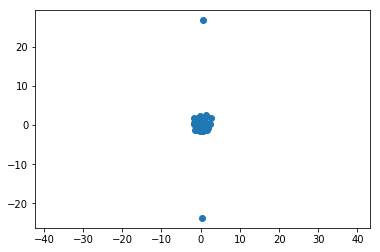

In [5]:
[y,E] = sammon(X);
plt.scatter(y[:,0],y[:,1])
plt.axis('equal');
plt.show()

The amount of structure present in the original but lost in the transformed
dataset is then measured by the stress function defined above.

Essentially, the error is given by summing up the squared differences (before
versus after transformation) in pairwise distances between points; the sum-
mations are over the range i < j so that each pairwise distance is counted
once (and not a second time with i and j swapped). The tendency to preserve
topology (mentioned above) is due to the factor of $d_{ij}$ in the denominator
of the main summation, ensuring that if the original distance between two
points is small, then the weighting given to their squared difference is greater.

# Visualisation of digits using MDS

Automatically created module for IPython interactive environment
Computing random projection
Computing MDS embedding
Done. Stress: 139667262.746509


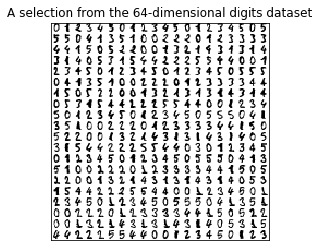

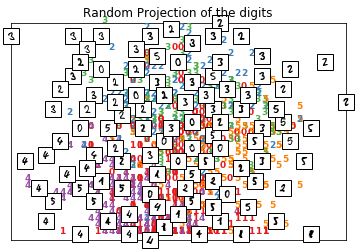

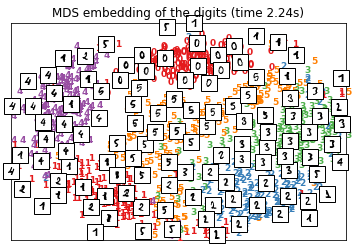

In [6]:
print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")



#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

Computing Sammon embedding


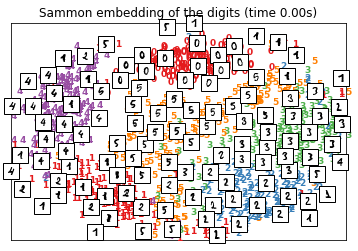

In [8]:
print("Computing Sammon embedding")
clf = sammon(X)
t0 = time()
plot_embedding(X_mds,
               "Sammon embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()